# Writing your first Neural Net #  
[based on this blog](https://towardsdatascience.com/writing-your-first-neural-net-in-less-than-30-lines-of-code-with-keras-18e160a35502)

[Recognizing numbers](https://en.wikipedia.org/wiki/MNIST_database) is the hello world of image recognition machine learning.  
This is a example uses Keras.  
[Keras](https://keras.io/) is a high-level neural networks API.  

Don't be intimidated by all the terms and definitions. There are a lot of links to wikipedia articles for starting reading on several items, but the video  really contains all you need to know.

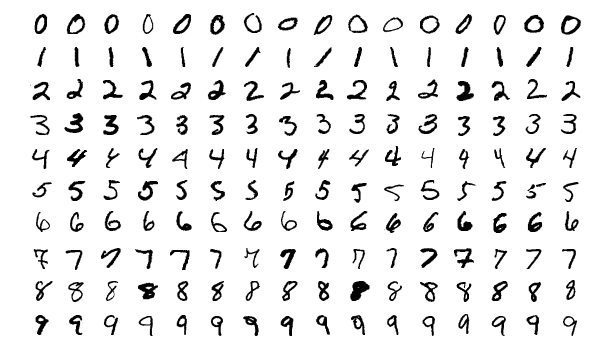

## Prereqs ##  
Assuming you have set up Anaconda and you are able to run jupyter notebooks, all you need to do is make sure Keras with the TensorFlow backend is installed  
`pip3 install Keras`    
`pip3 install Tensorflow`  

In [ ]:
# Install Keras and Tensorflow in the current Jupyter kernel
import sys
!{sys.executable} -m pip install Keras
!{sys.executable} -m pip install Tensorflow

# What is a neural network #

## some buzz words##

A neural network passes information contained within a **Vector or Scalar** through **layers** where the output of one layer, acts as the input into the next. While traveling through these layers the input is modified by **weight** and **bias** and sent to the [**activation function**](https://en.wikipedia.org/wiki/Activation_function) to map the output. The learning then occurs via a [**Cost (or loss) function**](https://en.wikipedia.org/wiki/Loss_function), that compares the actual output and the desired output, which in turn helps the function alters and adjusts the weights and biases to minimize the cost via a process called  [**backpropagation**](https://en.wikipedia.org/wiki/Backpropagation)  

[**Gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent) algorithm optimizes the model by calculating the gradient of the loss function. Backpropagation computes the gradient , gradient descent uses the gradients for training

Better see this video from youtube channel [3blue1brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw), or watch it embedded in the notebook below

In [1]:
#or watch the embbed video in the notebook
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/aircAruvnKk",663,382)

# Lets start #
We start with importing the keras Python modules.

In [ ]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

We load the image database and split the dataset into train and test sets.
The images are available as [dataset](https://keras.io/datasets/#mnist-database-of-handwritten-digits) the keras datasets

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Build our model ##
* initialize a sequential model called network;
* add the neural network layers.  
  
A dense layer means that each neuron receives input from all the neurons in the previous layer

784 (28 * 28)  and 10 are the dimension of the output, since we have to predict a number we end with 10 and we start with the number of pixels in the image.

We end with a layer 
The input_shape is the shape of the picture in our case 28 * 28 pixels  
and the activation is [relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)), the activation function we use for calculating the output. The last layer uses [softmax](https://en.wikipedia.org/wiki/Softmax_function) as activation function.

In [ ]:
network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# compile the network #
We now configure the learning process. the network needs to know these three things: 
* the optimizer algorithm [adam](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam) 
* the loss function [categorical crossentropy](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy) which is usefull when for one category classifications (note that this is why we need the softmax in the last layer.) 
* the metric used to judge the performance of the model

In [ ]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Reshaping the data #  
All the input data must be shaped into the format the model uses.  
We reshape our data and split it between 60,000 train images (28 *28 pixels) and 10,000 test images (28 *28 pixels).  
_(Note that is the shape of our input images was already (28 * 28), but in more complex case you need to reshape anyway)_

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We will also need to encode the data. We use [categorical encoding](https://keras.io/utils/#to_categorical). This is needed for use with categorical_crossentropy loss function.

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Run it!# 
To run it call the fit function and pass in our required parameters.
The values are chosen to optimize performance and accuracy. 

* Batch: a set of 128 images that are processed independently in parallel. 
* Epoch: one pass over the entire dataset, used to separate training into distinct phases, which is useful for logging and periodic evaluation.

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# The result #
If you used the batch size 128 and epochs 5 you will see and accuracy of 99%.

links:  
https://en.wikipedia.org/wiki/History_of_artificial_neural_networks)  
https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3 
https://blog.francium.tech/build-your-own-image-classifier-with-tensorflow-and-keras-dc147a15e38e

Deep Learning with Python by Francois Chollet, which inspired this tutorial.
